PREGUNTA 1

In [1]:
from google.colab import files # load skimage libraries
import io
uploaded = files.upload()

Saving acero.png to acero.png


In [2]:
import skimage as sk # load skimage libraries
from skimage import io
I = sk.io.imread('acero.png') # read image using imread function

Tamaño de la imagen

In [3]:
I.shape

(1024, 1024, 3)

Tipo de imagen 'unit8' -> pixeles de 0 hasta 255


In [4]:
I.dtype

dtype('uint8')

/tmp/ipython-input-1534323884.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I) # visualize image using imshow function
/tmp/ipython-input-1534323884.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


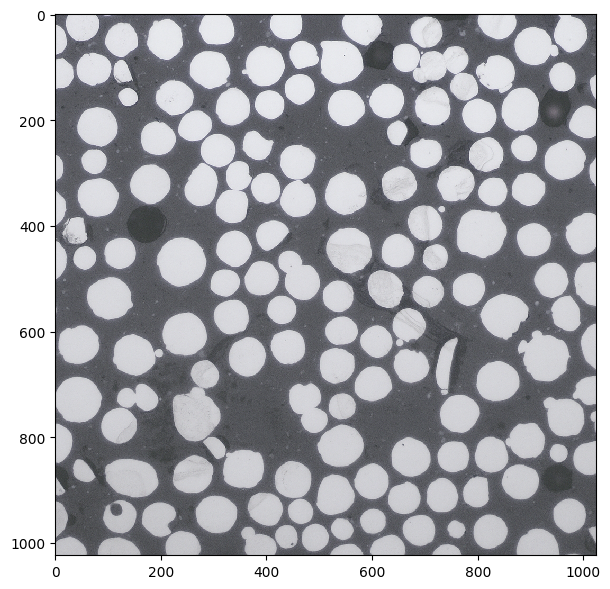

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I) # visualize image using imshow function
sk.io.show()

In [ ]:
PREGUNTA 2

In [9]:
IG = sk.color.rgb2gray(I)
IG.shape

(1024, 1024)

"El histograma muestra dos picos principales:
- Un pico a la izquierda (valores bajos ~0-100) que corresponde a las
  regiones oscuras de la imagen
  
- Un pico a la derecha (valores altos ~150-255) que corresponde a las
  regiones claras de la imagen


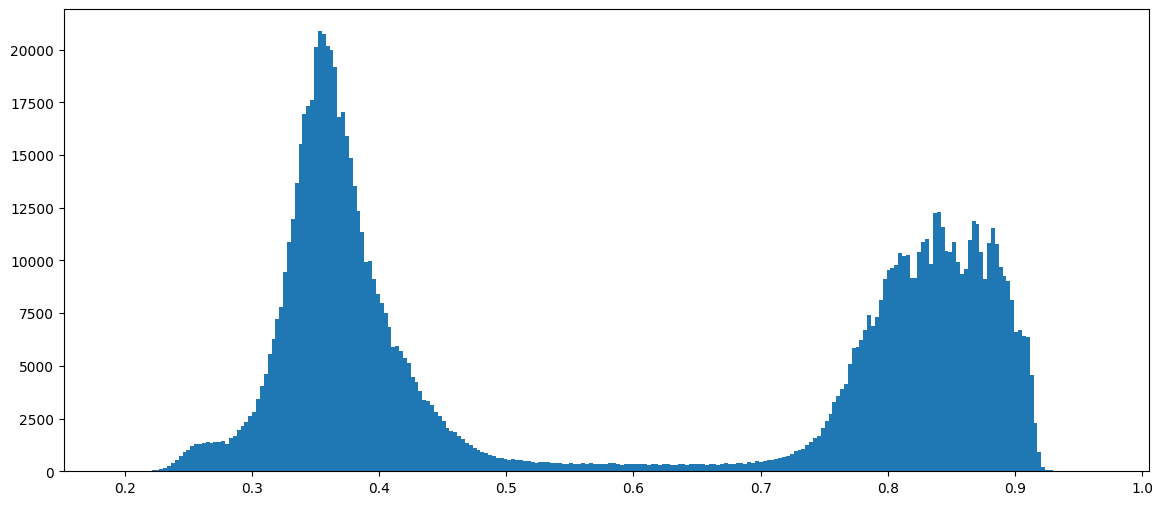

In [14]:
# reshape the uint8 image as 1d array:
v = IG.reshape(IG.shape[0]*IG.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=255,density=False)
plt.show()

PREGUNTA 3

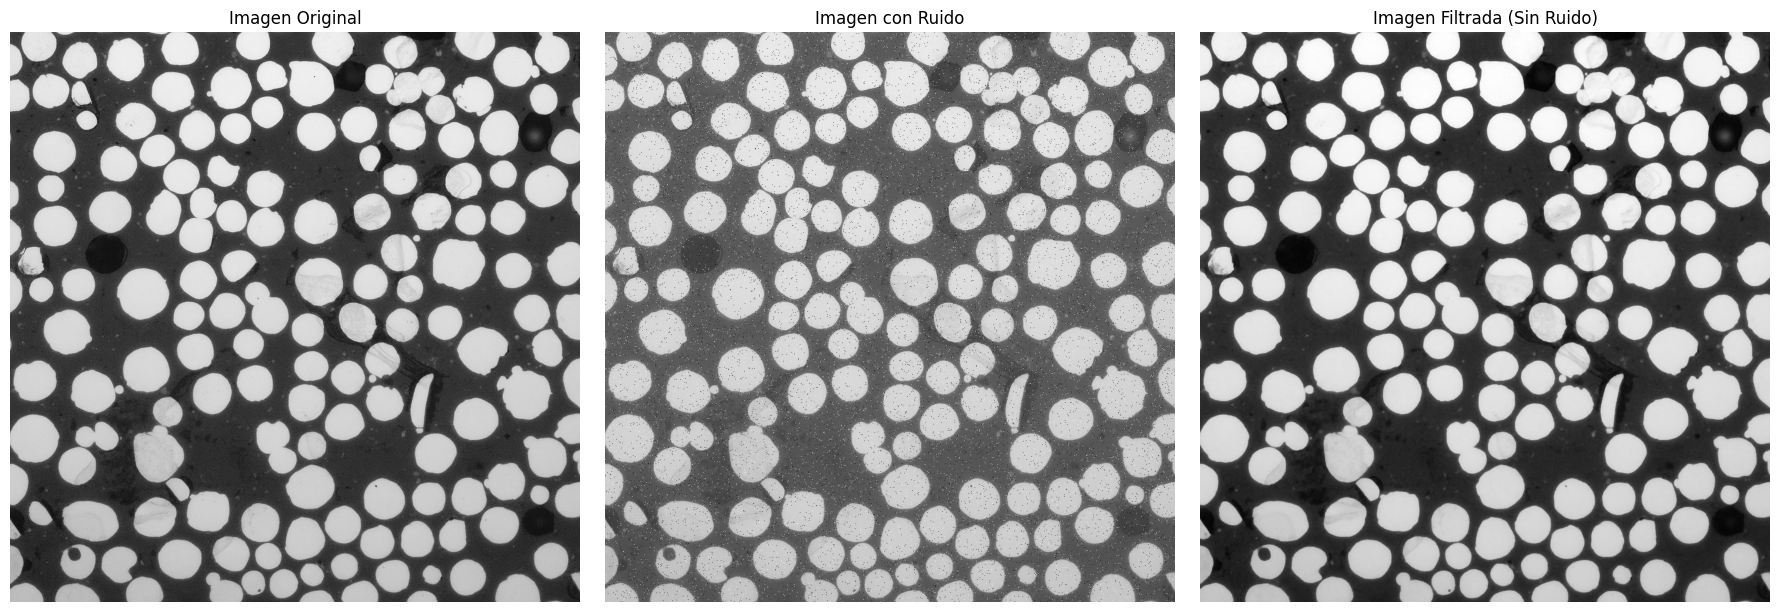

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import io, img_as_ubyte
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.filters import median

img_original = io.imread('acero.png')

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img.copy()
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

# Aplicar filtro mediano para eliminar el ruido
sel5 = disk(2) # structuring element disk radius 2 pixels
img_filtered = median(noisy_image, sel5)

# Mostrar un plot de tres imágenes
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6), sharex=True, sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Imagen Original')
ax1.axis('off')

ax2.imshow(noisy_image, cmap=plt.cm.gray)
ax2.set_title('Imagen con Ruido')
ax2.axis('off')

ax3.imshow(img_filtered, cmap=plt.cm.gray)
ax3.set_title('Imagen Filtrada (Sin Ruido)')
ax3.axis('off')

plt.tight_layout()
plt.savefig('resultado_3_imagenes.png')
plt.show()

PREGUNTA 4

In [42]:
from sklearn.cluster import KMeans


v = img_filtered.reshape(img_filtered.shape[0]*img_filtered.shape[1], 1)


NC = 2
km_algo = KMeans(NC).fit(v)

In [43]:

km_algo.cluster_centers_

array([[ 94.46006941],
       [212.13308526]])

In [44]:

km_algo.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Cluster centers:
[[ 94.46006941]
 [212.13308526]]


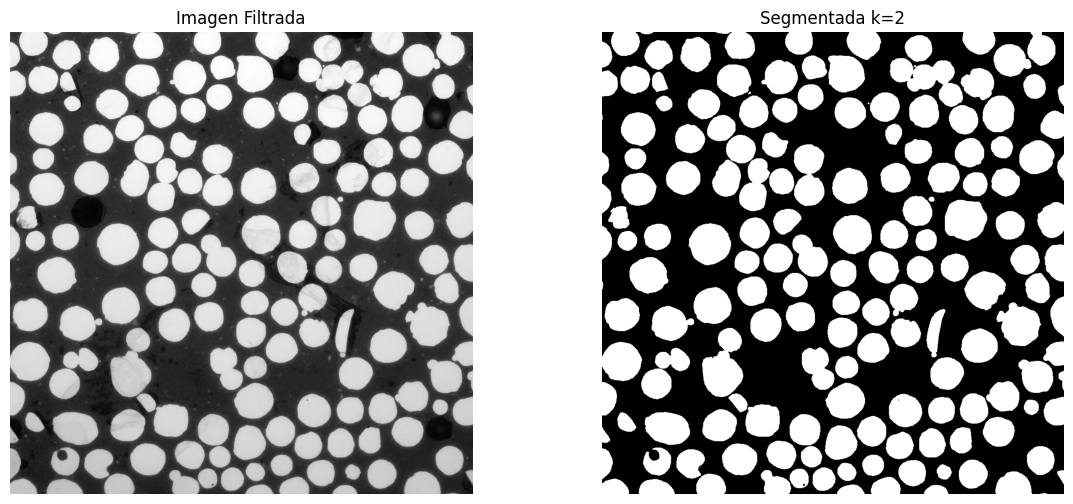

In [52]:
from sklearn.cluster import KMeans
import numpy as np

# Reshape the filtered image as 1d array
v = img_filtered.reshape(img_filtered.shape[0]*img_filtered.shape[1], 1)

# Fit a Kmeans clustering model with two clusters
NC = 2
km_algo = KMeans(NC, random_state=0).fit(v)

# Cluster centers
print("Cluster centers:")
print(km_algo.cluster_centers_)

# Reshape back result as image
segmented_image = km_algo.labels_.reshape(img_filtered.shape[0], img_filtered.shape[1])

# Display the result
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.imshow(img_filtered, cmap='gray')
plt.title('Imagen Filtrada')
plt.axis('off')

plt.subplot(122)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentada k=2')
plt.axis('off')

plt.show()

PREGUNTA 5

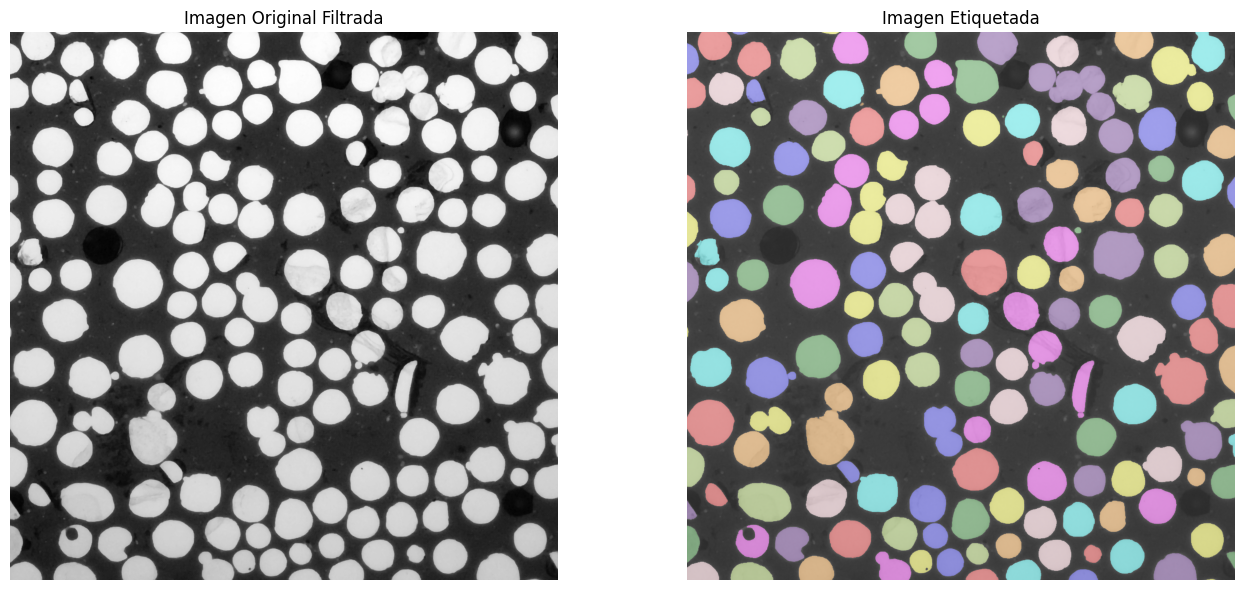

Número de objetos encontrados: 163


In [46]:
from skimage.measure import label
from skimage.color import label2rgb

# Etiquetar los objetos en la imagen segmentada
labeled_image = label(segmented_image)

# Crear una imagen coloreada para visualizar las etiquetas
image_label_overlay = label2rgb(labeled_image, image=img_filtered, bg_label=0)

# Mostrar los resultados
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

ax1.imshow(img_filtered, cmap='gray')
ax1.set_title('Imagen Original Filtrada')
ax1.axis('off')

ax2.imshow(image_label_overlay)
ax2.set_title('Imagen Etiquetada')
ax2.axis('off')

plt.tight_layout()
plt.show()

# Número de objetos encontrados
print(f'Número de objetos encontrados: {labeled_image.max()}')

Descripción del resultado: ¿Cuántas regiones hay en la imagen?

PREGUNTA 6

In [47]:
from skimage import measure
import pandas as pd

# Extraer propiedades de cada región
props = measure.regionprops_table(labeled_image,
                                   properties=['label', 'area', 'major_axis_length', 'orientation'])

df_propietats = pd.DataFrame(props)
df_propietats.head()

label    area  major_axis_length  orientation
0      1  2823.0          65.420247     1.568833
1      2   110.0          28.071390    -1.561353
2      3    95.0          31.324076     1.546508
3      4  3300.0          67.903924     1.273101
4      5  2625.0          63.965678    -1.563036

<Axes: xlabel='major_axis_length', ylabel='area'>

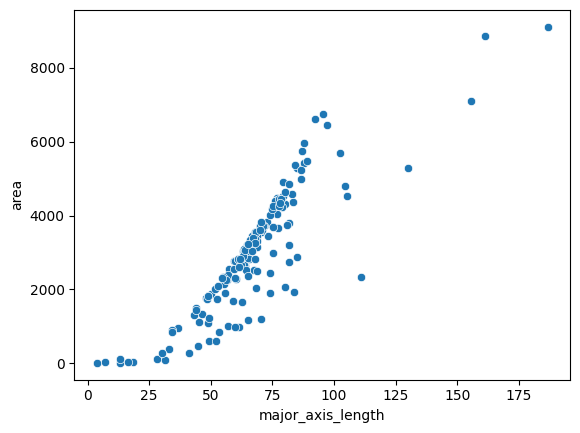

In [49]:
import seaborn as sns

# Diagrama de dispersión: Área vs Longitud del Eje Mayor
sns.scatterplot(x='major_axis_length', y='area', data=df_propietats)

PREGUNTA 7

In [50]:
# Filtrar regiones con área mayor de 4000 píxeles
regiones_grandes = df_propietats[df_propietats['area'] > 4000]

# Mostrar las regiones filtradas
regiones_grandes

label    area  major_axis_length  orientation
9       10  4044.0          76.826228     0.028183
12      13  4311.0          80.067353     1.273000
14      15  5435.0          87.867297     0.683588
15      16  9112.0         186.801516     1.210069
16      17  4474.0          76.766823    -0.713503
17      18  4265.0          76.651885     1.309242
31      32  4576.0          82.800293    -0.217118
37      38  4434.0          76.842500     1.243614
47      48  4526.0          79.322309    -1.075586
48      49  7091.0         155.750384     0.015481
52      53  5281.0         130.240059    -0.197321
54      55  4388.0          76.077523    -1.308350
57      58  4898.0          79.174139     1.094535
61      62  4450.0          77.511775     1.326111
65      66  6757.0          95.600343    -1.312068
70      71  5738.0          87.157796     0.795453
73      74  6618.0          92.235989    -0.982567
78      79  4809.0         104.474576     0.565248
86      87  5280.0          85.033324     1.356876
88      89  5481.0          89.092522    -1.032812
94      95  5370.0          84.208935    -1.484514
97      98  4456.0          78.631032    -1.356670
100    101  6462.0          97.102474     0.779647
101    102  4980.0          86.823261     1.461944
102    103  4021.0          74.151582    -0.326825
106    107  8868.0         161.160613    -0.200082
107    108  4842.0          81.689611    -1.434988
110    111  5957.0          87.742993     1.269644
111    112  4542.0         105.310711     0.423643
114    115  4172.0          74.793263    -1.131793
115    116  4366.0          83.467628     0.786832
120    121  5234.0          86.486489    -1.210245
123    124  4255.0          75.443018     0.965411
127    128  4642.0          80.033696    -1.272497
128    129  4231.0          78.965749    -1.045417
129    130  5691.0         102.604703     1.330124
134    135  4245.0          77.549885    -0.343027
140    141  4342.0          78.277933     1.487461

In [51]:
# Número de regiones con área mayor de 4000 píxeles
num_regiones_grandes = len(regiones_grandes)
print(f'Número de regiones con área mayor de 4000 píxeles: {num_regiones_grandes}')

Número de regiones con área mayor de 4000 píxeles: 38


PREGUNTA 8

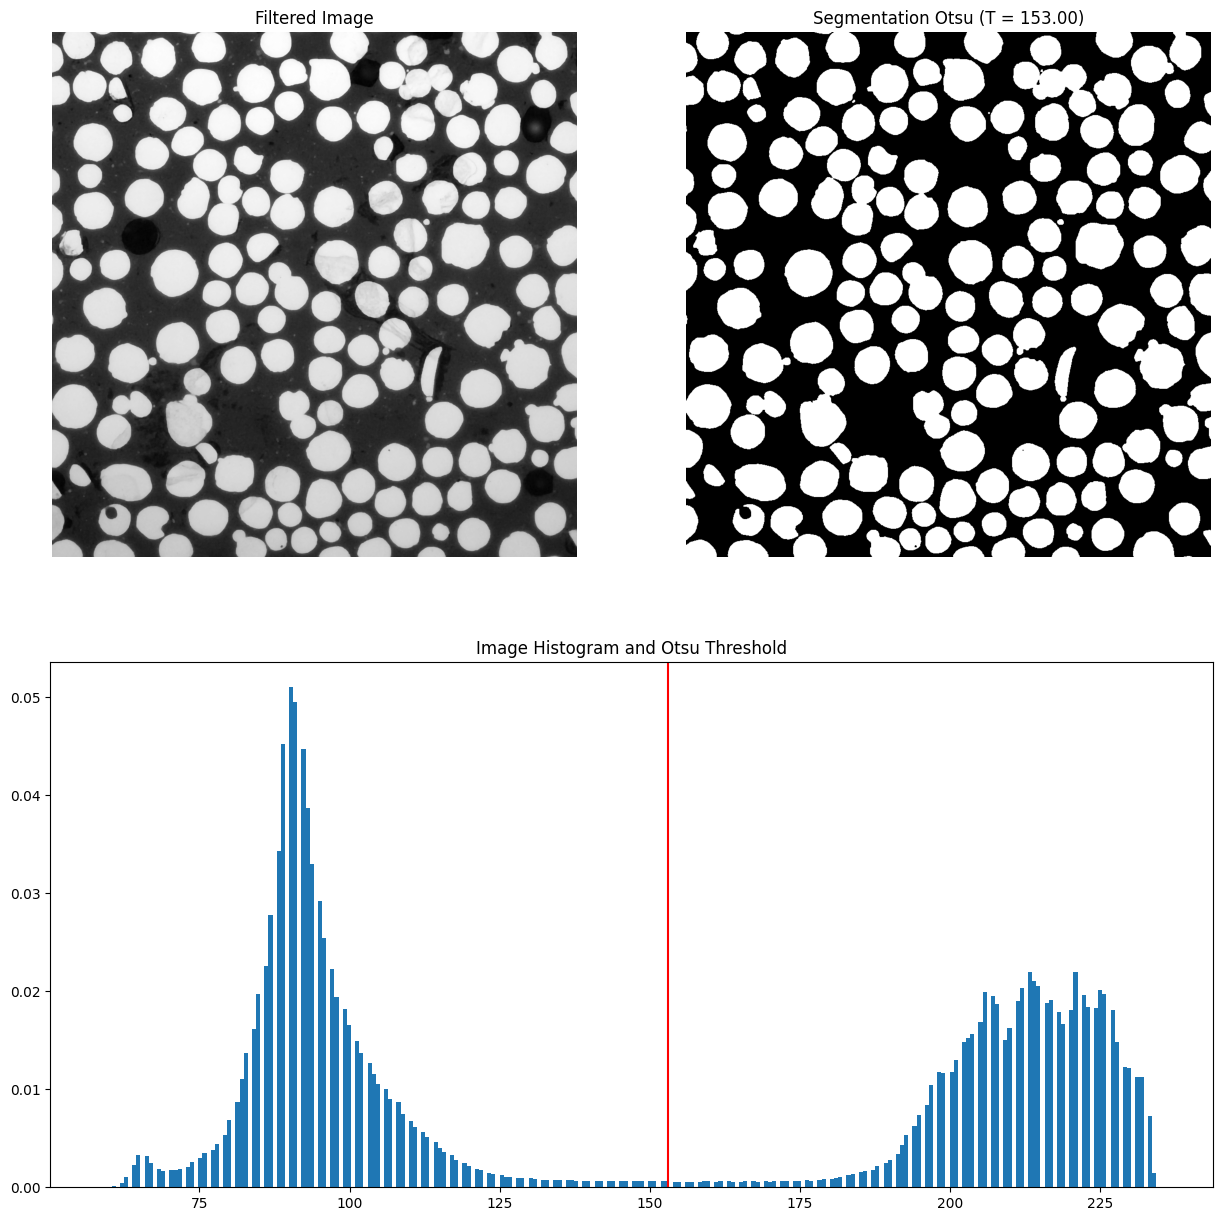

Número de regiones detectadas: 162


In [54]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.filters import threshold_otsu
from skimage.measure import label

# Find Otsu's threshold for filtered image:
threshold_value = threshold_otsu(img_filtered)

# Apply threshold to filtered image:
img_otsu = img_filtered >= threshold_value

# Label detected regions:
labeled_otsu = label(img_otsu)
num_regiones = labeled_otsu.max()

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(img_filtered, cmap=plt.cm.gray)
ax1.set_title('Filtered Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(img_otsu, cmap=plt.cm.gray)
ax2.set_title('Segmentation Otsu (T = {:.2f})'.format(threshold_value))
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,:])
ax3.hist(img_filtered.ravel(), bins=256, density=True)
ax3.axvline(threshold_value, color='r')
ax3.set_title('Image Histogram and Otsu Threshold')
plt.show()

print(f'Número de regiones detectadas: {num_regiones}')

En cuanto a los métodos de segmentación, Otsu generalmente funciona mejor para la imagen de acero porque calcula automáticamente el umbral óptimo que maximiza la varianza entre el fondo y los objetos, siendo ideal cuando el histograma muestra dos picos bien separados (distribución bimodal). K-means con k=2 produce resultados similares pero con mayor costo computacional, ya que agrupa píxeles iterativamente basándose en similitud de intensidades. Aunque ambos métodos suelen dar resultados parecidos en imágenes simples como el acero, pueden diferir en zonas de transición o cuando hay intensidades intermedias. Las pequeñas diferencias en el número de regiones detectadas dependen de cómo cada algoritmo maneja estos píxeles ambiguos. Valoración del curso: Este curso ha proporcionado una comprensión sólida del procesamiento de imágenes, desde conceptos fundamentales (lectura, histogramas, tipos de datos) hasta técnicas avanzadas de segmentación (K-means, Otsu) y análisis de regiones (extracción de características como área, orientación, eje mayor). El workflow completo aprendido (preprocesamiento con filtros → segmentación → etiquetado → análisis estadístico) es directamente aplicable a problemas reales en medicina (detección de tumores), industria (control de calidad de materiales), e investigación (análisis microscópico). La combinación de teoría algorítmica con implementación práctica en Python (scikit-image, pandas, seaborn) permite aplicar estos conocimientos inmediatamente, desarrollando habilidades esenciales para visión por computador y automatización industrial.